<a href="https://colab.research.google.com/github/Its-Binto/AkinatorFB/blob/main/shhsdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mne

import mne
!pip install wfdb
!pip install wfdb matplotlib
!pip install biosppy peakutils


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 104.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.1 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.1 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.0/158.0 kB 10

In [3]:
from google.colab import files
import os

# List files in the content directory
!ls /content

sample_data	       shhs1-200001-profusion.xml  shhs1-200079-profusion.xml
shhs1-200001.edf       shhs1-200079.edf		   shhs1-200079-rpoint.csv
shhs1-200001-nsrr.xml  shhs1-200079-nsrr.xml


In [4]:
uploaded = files.upload()  # Select your files in the dialog

KeyboardInterrupt: 

In [5]:
!pip install mne pyedflib numpy pandas tensorflow keras-tcn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 19.1 MB/s eta 0:00:00


In [6]:
import mne
import pyedflib
import numpy as np

# Load EDF file
raw = mne.io.read_raw_edf('/content/shhs1-200079.edf', preload=True)
print(raw.info)  # View channel information

# Extract data as numpy array
data = raw.get_data()
sampling_rate = raw.info['sfreq']

Extracting EDF parameters from /content/shhs1-200079.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3596249  =      0.000 ... 28769.992 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: SaO2, H.R., EEG(sec), ECG, EMG, EOG(L), EOG(R), EEG, SOUND, ...
 chs: 16 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 62.5 Hz
 meas_date: 1985-01-01 22:30:00 UTC
 nchan: 16
 projs: []
 sfreq: 125.0 Hz
 subject_info: <subject_info | his_id: >
>


In [7]:
from bs4 import BeautifulSoup
import pandas as pd

# Load NSRR XML file
with open('/content/shhs1-200079-nsrr.xml', 'r') as f:
    nsrr_data = BeautifulSoup(f, 'xml')

# Load Profusion XML file
with open('/content/shhs1-200079-profusion.xml', 'r') as f:
    profusion_data = BeautifulSoup(f, 'xml')

# Process annotations as needed

In [8]:
rpoints = pd.read_csv('/content/shhs1-200079-rpoint.csv')

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Example preprocessing - adjust based on your needs
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.T).T  # Scale each channel

# Create segments/windows (example for sleep stage classification)
def create_segments(data, window_size=3000, step_size=1000):
    segments = []
    for i in range(0, data.shape[1] - window_size, step_size):
        segments.append(data[:, i:i+window_size])
    return np.array(segments)

X = create_segments(scaled_data)
# You'll need to align X with your labels from the annotation files

In [10]:
import mne
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Load EDF file
raw = mne.io.read_raw_edf('/content/shhs1-200079.edf', preload=True)

Extracting EDF parameters from /content/shhs1-200079.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3596249  =      0.000 ... 28769.992 secs...


In [11]:
def parse_nsrr_annotations(xml_path):
    with open(xml_path, 'r') as f:
        soup = BeautifulSoup(f, 'xml')

    events = []
    for event in soup.find_all('ScoredEvent'):
        name = event.EventType.text
        start = float(event.Start.text)
        duration = float(event.Duration.text)
        events.append({'onset': start, 'duration': duration, 'description': name})

    return pd.DataFrame(events)

nsrr_annots = parse_nsrr_annotations('/content/shhs1-200079-nsrr.xml')

In [12]:
rpoints = pd.read_csv('/content/shhs1-200079-rpoint.csv')

In [13]:
# Create MNE annotations from NSRR data
annotations = mne.Annotations(
    onset=nsrr_annots['onset'],
    duration=nsrr_annots['duration'],
    description=nsrr_annots['description']
)

# Add annotations to raw object
raw.set_annotations(annotations)

<RawEDF | shhs1-200079.edf, 16 x 3596250 (28770.0 s), ~439.0 MiB, data loaded>

Using matplotlib as 2D backend.


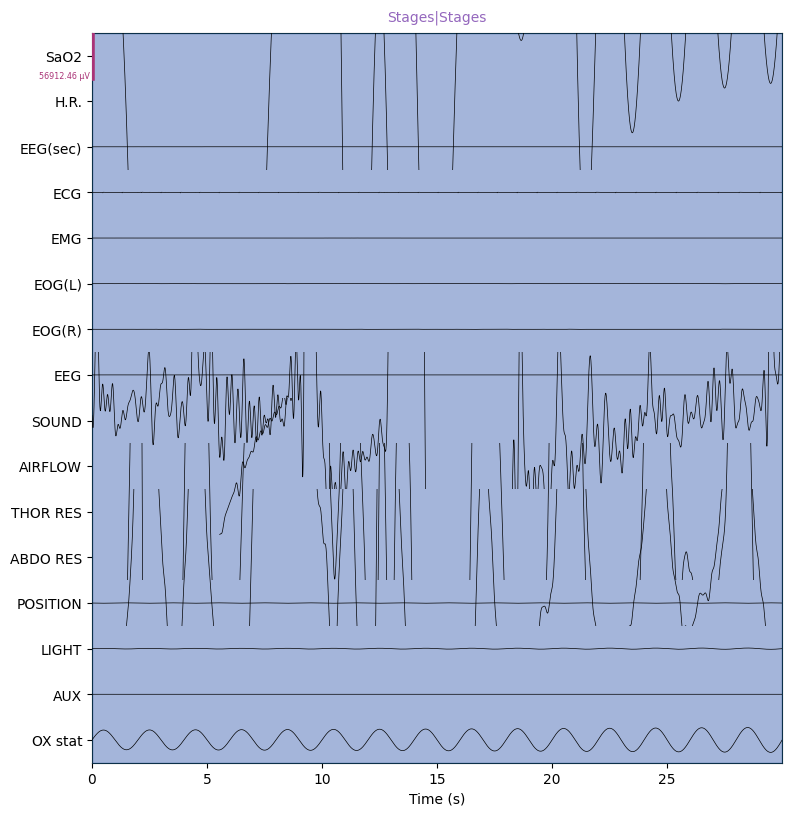

In [14]:
# Plot raw data with annotations
fig = raw.plot(duration=30, scalings='auto', show_scrollbars=False)
plt.show()

In [21]:
import mne
import numpy as np
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from ipywidgets import interact, FloatSlider

# 1. Load and prepare data
def load_data():
    # Load EDF
    raw = mne.io.read_raw_edf('/content/shhs1-200079.edf', preload=True)

    # Load NSRR XML annotations
    with open('/content/shhs1-200079-nsrr.xml', 'r') as f:
        soup = BeautifulSoup(f, 'xml')

    # Extract apnea and hypopnea events
    apnea_events = []
    for event in soup.find_all('ScoredEvent'):
        event_type = event.EventType.text.strip()
        if 'Apnea' in event_type or 'Hypopnea' in event_type:
            apnea_events.append({
                'onset': float(event.Start.text),
                'duration': float(event.Duration.text),
                'description': event_type.replace(" Sleep", "").strip()
            })

    # Create MNE annotations
    annotations = mne.Annotations(
        onset=[e['onset'] for e in apnea_events],
        duration=[e['duration'] for e in apnea_events],
        description=[e['description'] for e in apnea_events]
    )
    raw.set_annotations(annotations)

    return raw

# Load raw data
raw = load_data()

# 2. Define interactive EEG plotting
def plot_eeg_with_apnea(start_time=0, window_size=30):
    sfreq = raw.info['sfreq']
    start_sample = int(start_time * sfreq)
    end_sample = int((start_time + window_size) * sfreq)

    # Get EEG channels
    eeg_chs = [ch for ch in raw.ch_names if 'EEG' in ch]
    if not eeg_chs:
        raise ValueError("No EEG channels found with 'EEG' in their names.")

    eeg_chs = eeg_chs[:4]  # Limit to first 4 channels
    picks = mne.pick_channels(raw.ch_names, include=eeg_chs)

    # Get EEG data and time
    data, times = raw.get_data(picks=picks, start=start_sample, stop=min(end_sample, len(raw.times) - 1), return_times=True)

    # Create figure
    fig = go.Figure()
    offsets = np.arange(len(eeg_chs)) * 100
    for i, (ch_data, ch_name) in enumerate(zip(data, eeg_chs)):
        fig.add_trace(go.Scatter(
            x=times,
            y=ch_data + offsets[i],
            mode='lines',
            name=ch_name
        ))

    # Apnea event color mapping
    apnea_color_map = {
        'Obstructive Apnea': 'red',
        'Central Apnea': 'blue',
        'Mixed Apnea': 'purple',
        'Hypopnea': 'orange'
    }

    # Add apnea annotations from raw.annotations
    for annot in raw.annotations:
        if annot['onset'] + annot['duration'] < start_time or annot['onset'] > start_time + window_size:
            continue
        vis_start = max(annot['onset'], start_time)
        vis_end = min(annot['onset'] + annot['duration'], start_time + window_size)
        color = apnea_color_map.get(annot['description'], 'gray')

        fig.add_vrect(
            x0=vis_start,
            x1=vis_end,
            fillcolor=color,
            opacity=0.3,
            layer="below",
            line_width=0,
            annotation_text=annot['description'],
            annotation_position="top left"
        )

    fig.update_layout(
        title=f"EEG with Apnea Annotations (Window: {window_size}s)",
        xaxis_title="Time (s)",
        yaxis_title="Amplitude (μV)",
        height=600,
        showlegend=True,
        # xaxis=dict(rangeslider=dict(visible=True))  # Optional zoom
    )

    fig.update_yaxes(
        tickvals=offsets,
        ticktext=eeg_chs
    )

    fig.show()

# 3. Create interactive slider
max_time = raw.times[-1]
default_window = 30

interact(
    plot_eeg_with_apnea,
    start_time=FloatSlider(
        min=0,
        max=max_time - default_window,
        step=default_window / 10,
        value=0,
        description='Start Time (s)',
        continuous_update=False
    ),
    window_size=FloatSlider(
        min=5,
        max=60,
        step=5,
        value=default_window,
        description='Window Size (s)',
        continuous_update=False
    )
)
